In [112]:
path = '/Users/jaeyeobjeong/Desktop/포트폴리오/프로젝트/소비예측 경진대회/data'

In [113]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.preprocessing import MinMaxScaler

In [114]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [115]:
train = pd.read_csv(f'{path}/train_0504.csv')
test = pd.read_csv(f'{path}/test_0504.csv')

In [116]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

ohe_features = ['Education', 'Marital_Status']

train_ohe, test_ohe = pd.DataFrame(), pd.DataFrame()
for feat in ohe_features:
    # 라벨 인코더 생성
    encoder = OneHotEncoder()

    # X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
    train_oh_encoded = encoder.fit_transform(train[feat].values.reshape(-1,1)).toarray()
    test_oh_encoded = encoder.transform(test[feat].values.reshape(-1,1)).toarray()

    train_oh = pd.DataFrame(train_oh_encoded, 
                 columns = [feat + '_' + value for value in train[feat].unique()])
    test_oh = pd.DataFrame(test_oh_encoded, 
                 columns = [feat + '_' + value for value in train[feat].unique()])
    
    train_ohe = pd.concat([train_ohe, train_oh], axis = 1)
    test_ohe = pd.concat([test_ohe, test_oh], axis = 1)

In [117]:
train = pd.concat([train, train_ohe], axis = 1)
test = pd.concat([test, test_ohe], axis = 1)

In [118]:
train_ohe.columns

Index(['Education_Master', 'Education_Graduation', 'Education_Basic',
       'Education_PhD', 'Education_2n Cycle', 'Marital_Status_Together',
       'Marital_Status_Single', 'Marital_Status_Married',
       'Marital_Status_Widow', 'Marital_Status_Divorced',
       'Marital_Status_Alone', 'Marital_Status_YOLO', 'Marital_Status_Absurd'],
      dtype='object')

## Validation

### Set X, y

In [124]:
in_model_features = ['Income', 'NumWebVisitsMonth', 'NumPurchases', 
                     'register_age', 'customer_terms',
                     #'Kidhome', 'Teenhome',
                     'diff_kid_teen',
                     'Sum_AcceptedCmp', 'Complain',
                     #'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Recency',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'Education_Master', 'Education_Graduation', 'Education_Basic',
                     'Education_PhD', 'Education_2n Cycle', 'Marital_Status_Together',
                     'Marital_Status_Single', 'Marital_Status_Married',
                     'Marital_Status_Widow', 'Marital_Status_Divorced',
                     'Marital_Status_Alone', 'Marital_Status_YOLO', 'Marital_Status_Absurd']

In [125]:
X = train[in_model_features]
y = np.sqrt(train['target'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Cross Validation

In [127]:
val_xgb = XGBRegressor(random_state = 0)
val_lgb = LGBMRegressor(boosting_type = 'dart', random_state = 0)
val_cat = CatBoostRegressor(random_state = 0, verbose = 500)

In [165]:
scores_xgb = cross_val_score(val_xgb, X_train, y_train, cv = 5)
scores_lgb = cross_val_score(val_lgb, X_train, y_train, cv = 5)
scores_cat = cross_val_score(val_cat, X_train, y_train, cv = 5)

print('Non Sampling XGB model :', scores_xgb)
print('Non Sampling LGBM model :', scores_lgb)
print('Non Sampling CAT model :', scores_cat)

Learning rate set to 0.038378
0:	learn: 12.3589542	total: 594us	remaining: 594ms
500:	learn: 1.2619785	total: 283ms	remaining: 282ms
999:	learn: 0.6359509	total: 556ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3173742	total: 244us	remaining: 244ms
500:	learn: 1.1751433	total: 279ms	remaining: 278ms
999:	learn: 0.6367520	total: 550ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3349184	total: 546us	remaining: 546ms
500:	learn: 1.2342054	total: 274ms	remaining: 273ms
999:	learn: 0.6603473	total: 557ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.5278923	total: 194us	remaining: 194ms
500:	learn: 1.2301723	total: 263ms	remaining: 262ms
999:	learn: 0.6246757	total: 542ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3283040	total: 909us	remaining: 908ms
500:	learn: 1.2205977	total: 277ms	remaining: 276ms
999:	learn: 0.5969029	total: 553ms	remaining: 0us
Non Sampling XGB model : [0.91692473 0.91346053 0.92959384 0.94000422 0.94340293]
Non

In [128]:
scores_xgb = cross_val_score(val_xgb, X_train, y_train, cv = 5)
scores_lgb = cross_val_score(val_lgb, X_train, y_train, cv = 5)
scores_cat = cross_val_score(val_cat, X_train, y_train, cv = 5)

print('Non Sampling XGB model :', scores_xgb)
print('Non Sampling LGBM model :', scores_lgb)
print('Non Sampling CAT model :', scores_cat)

Learning rate set to 0.038378
0:	learn: 12.3511761	total: 439us	remaining: 439ms
500:	learn: 1.2616143	total: 292ms	remaining: 291ms
999:	learn: 0.6346444	total: 570ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3266349	total: 614us	remaining: 614ms
500:	learn: 1.2529576	total: 276ms	remaining: 275ms
999:	learn: 0.6832168	total: 545ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3233268	total: 1.22ms	remaining: 1.21s
500:	learn: 1.2995294	total: 275ms	remaining: 274ms
999:	learn: 0.6509804	total: 555ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.5174388	total: 510us	remaining: 510ms
500:	learn: 1.2295348	total: 270ms	remaining: 269ms
999:	learn: 0.5846130	total: 549ms	remaining: 0us
Learning rate set to 0.038387
0:	learn: 12.3253631	total: 554us	remaining: 554ms
500:	learn: 1.2654805	total: 269ms	remaining: 268ms
999:	learn: 0.6407602	total: 547ms	remaining: 0us
Non Sampling XGB model : [0.91041607 0.916701   0.91607818 0.92961322 0.93684899]
No

### Scoring by NMAE

In [129]:
import numpy as np
from sklearn.metrics import mean_squared_error

def nmae(true, pred):

    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    
    return score

In [168]:
val_cat = CatBoostRegressor(random_state = 0, verbose = 500)
val_cat.fit(X_train, y_train)
y_pred = val_cat.predict(X_test) # y예측

print(f'모델 NMAE: {nmae(y_test**2,y_pred**2)}')

Learning rate set to 0.039763
0:	learn: 12.3608283	total: 643us	remaining: 642ms
500:	learn: 1.3134552	total: 295ms	remaining: 294ms
999:	learn: 0.7379450	total: 584ms	remaining: 0us
모델 NMAE: 0.16934310982554732


In [130]:
val_cat = CatBoostRegressor(random_state = 0, verbose = 500)
val_cat.fit(X_train, y_train)
y_pred = val_cat.predict(X_test) # y예측

print(f'모델 NMAE: {nmae(y_test**2,y_pred**2)}')

Learning rate set to 0.039763
0:	learn: 12.3508422	total: 1.35ms	remaining: 1.35s
500:	learn: 1.3205962	total: 304ms	remaining: 302ms
999:	learn: 0.7141986	total: 587ms	remaining: 0us
모델 NMAE: 0.1667770947210116


In [14]:
val_xgb = XGBRegressor(random_state = 0)
val_xgb.fit(X_train, y_train)
y_pred = val_xgb.predict(X_test) # y예측

print(f'모델 NMAE: {nmae(y_test**2,y_pred**2)}')

모델 NMAE: 0.16219495074979795


## Submission Modeling

In [99]:
X_train = train[in_model_features]
y_train = np.sqrt(train['target'])

X_test = test[in_model_features]

In [100]:
print(X_train.shape, y_train.shape, X_test.shape)

(1108, 27) (1108,) (1108, 27)


In [101]:
cat = CatBoostRegressor(random_state = 0, verbose = 500)
cat.fit(X_train, y_train)

pred = cat.predict(X_test)

Learning rate set to 0.041612
0:	learn: 12.4012582	total: 1.13ms	remaining: 1.13s
500:	learn: 1.4416031	total: 321ms	remaining: 319ms
999:	learn: 0.8431076	total: 624ms	remaining: 0us


In [102]:
xgb = XGBRegressor(random_state = 0)
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

In [103]:
submission = pd.read_csv(f'{path}/sample_submission.csv')

In [104]:
submission['target'] = [0 if p < 0 else p**2 for p in pred]

In [105]:
submission.head()

,id,target
0,0,504.533299
1,1,902.900549
2,2,949.056863
3,3,1279.601278
4,4,1095.014507


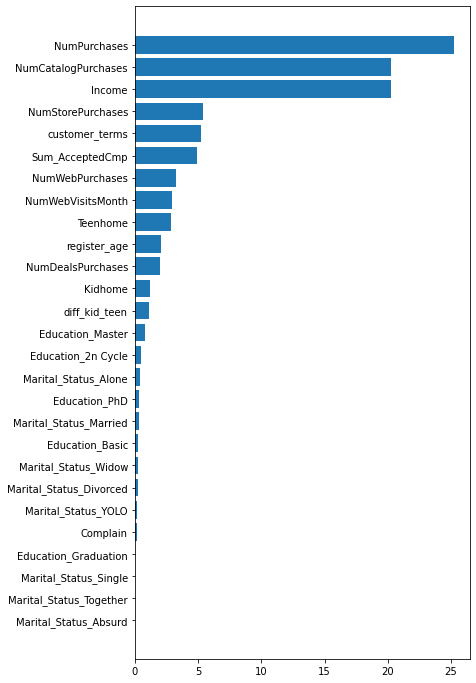

In [83]:
feature_imp = pd.DataFrame(
{
    'feature_name' : in_model_features,
    'feat_imp' : cat.feature_importances_
})
feature_imp.sort_values(by = 'feat_imp', ascending=True, inplace=True)

plt.figure(figsize = (6, 12))
plt.barh('feature_name', 'feat_imp', data = feature_imp)
plt.show()

## Model Ensemble

### IDEA

- 다중 공선성이 높은 feature들을 다른 모델에 넣고 앙상블 시도

In [132]:
cat_features = []
xgb_features = []

## Submit Prediction

In [109]:
len(in_model_features)

27

In [110]:
submission.to_csv(f"{path}/Submissions/cat_0504_{len(in_model_features)}_sqrt.csv", index=False)

## Submission Analysis

In [142]:
print(train.Income.mean(), train.NumPurchases.mean())
print(test.Income.mean(), test.NumPurchases.mean())

52075.809566787 12.779783393501805
52418.693140794225 12.334837545126353


In [145]:
print(train.target.mean(), np.median(train.target))
print(pred.mean(), np.median(pred))

617.1218411552346 412.0
593.915173530633 382.0635517223699


In [107]:
print(train.target.mean(), np.median(train.target))
print(submission.target.mean(), np.median(submission.target))

617.1218411552346 412.0
589.793491366255 367.0823346996349


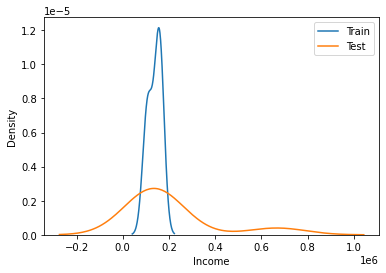

In [133]:
sns.kdeplot(train.query('Income > 100000')['Income'], label = 'Train')
sns.kdeplot(test.query('Income > 100000')['Income'], label = 'Test')
plt.legend()

<AxesSubplot:xlabel='target', ylabel='Density'>

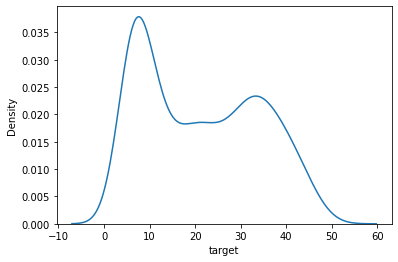

In [151]:
#sns.kdeplot(y_train)
sns.kdeplot(np.sqrt(y_train))

<AxesSubplot:xlabel='target', ylabel='Density'>

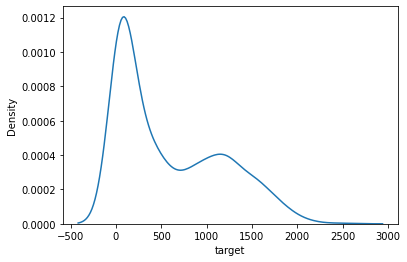

In [108]:
sns.kdeplot(submission['target'])